# Walkman

I'm not sure what this project is yet. I've set up a react frontend and a django backend, just real rough so I have scaffolding before I even have an idea. I want to mess around with my Spotify playlists as a starting point, maybe build a music player which recommends new music using my own algorithm rather than Spotify's native one. I can pull in song information using `spotipy` and maybe enhance that with metadata using [beets](https://beets.io/)?

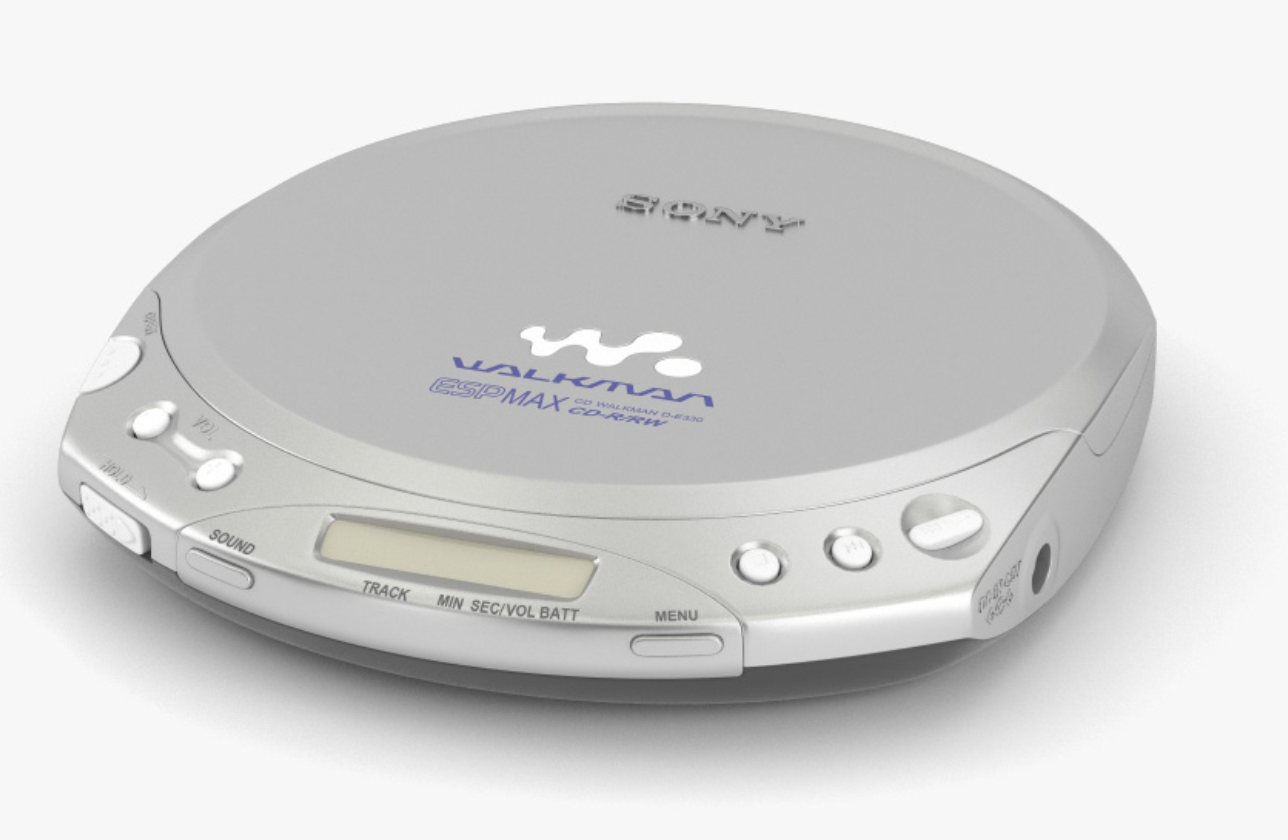 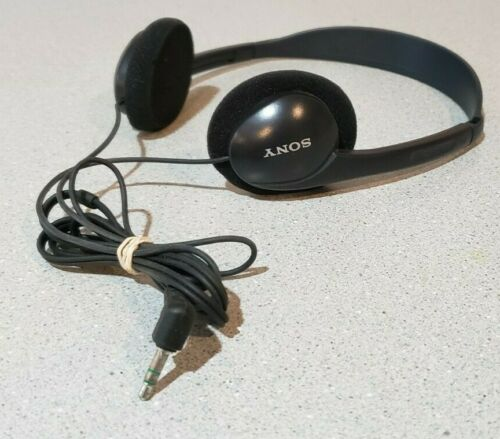

In [37]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Young Heart
Beautiful Lies
Fire Within
Live in London
Birdy
Birdy
Birdy (Deluxe Version)


In [38]:
playlists = spotify.user_playlists('tejas97siripurapu')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = spotify.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:50kNLsFf7BG1dXum3kw2n2 road trippy
   2 spotify:playlist:4Kyl9YQUO5h2zZmEwQ0NSz vibe
   3 spotify:playlist:37i9dQZF1EUMDoJuT8yJsl Your Top Songs 2021
   4 spotify:playlist:7nZQgxnUs5I3OZPiI3iqgi TG2
   5 spotify:playlist:37i9dQZF1EJGkmMilVMixY Gita + Tejas
   6 spotify:playlist:3FNsqtJcXMhwnJ2bjQ1RSg comfort
   7 spotify:playlist:37i9dQZF1EIUrZSnMckkpf Lucky Daye Mix
   8 spotify:playlist:37i9dQZF1EIWzrg550RmlA Kid Cudi Mix
   9 spotify:playlist:37i9dQZF1EIVlcsFCWqQva Saba Mix
  10 spotify:playlist:5HcSCbCtf1KwX3PpCm7npV motherland
  11 spotify:playlist:0hQ9ZyhoW3jHrIyoW2wKCS sangin
  12 spotify:playlist:6GqXQOB0Fv3hOPsjcmR4Jz whistler
  13 spotify:playlist:6awhJOsSrM2vlKvgIIalLU Juko Listening Session
  14 spotify:playlist:3cr1j8q7GIITDz9oOSHiaq xorcise
  15 spotify:playlist:66EQARO5d5YhOeJ0l1hO42 symph
  16 spotify:playlist:0CNFn7sZU1sJhmnvdBMktq lovin
  17 spotify:playlist:37i9dQZF1DWWBHeXOYZf74 POLLEN
  18 spotify:playlist:60QNsFN7cPjbwp3DGRcBEW local files
  

Ok, but how do I get access to the rest of my playlists? Whatever, for the time being I'll just use "Juko Listening Session", which is a playlist created by another app I made a couple years ago.

In [25]:
playlist = spotify.playlist("spotify:playlist:6awhJOsSrM2vlKvgIIalLU")
for item in playlist['tracks']['items']:
    print(item['track']['name'])

Swimming Pools (Drank)
Energy
You Was Right


It's only three songs, lol. Back to trying to get access to my 2k song playlist, that has more of the music I listen to day-to-day anyways so it'll be more relevant.

In [39]:
%set_env SPOTIPY_REDIRECT_URI=https://www.google.com

scope = [
    'playlist-read-collaborative',
    'playlist-modify-public',
    'playlist-read-private',
    'playlist-modify-private',
    'user-read-email',
    'user-read-private',
    'user-modify-playback-state',
    'user-read-playback-state',
    'user-read-currently-playing',
]

spotify = spotipy.Spotify(client_credentials_manager=SpotifyOAuth(open_browser=False, scope=scope))


env: SPOTIPY_REDIRECT_URI=https://www.google.com


Sweet I figured out how to authenticate using OAuth rather than just using the client ID and secret. OAuth allows you to make requests about the current user (me), things that require authorization like fetching private and collaborative playlists.

To get OAuth working without an actual website up to redirect to I just used www.google.com as my redirect-uri, then copied and pasted the URL when prompted: https://www.google.com/?code=blahblahblah.

In [27]:
playlists = spotify.current_user_playlists()

while playlists:
    for i, playlist in enumerate(playlists['items']):
        if playlist['name'] == 'vibe':
            print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = spotify.next(playlists)
    else:
        playlists = None

   2 spotify:playlist:4Kyl9YQUO5h2zZmEwQ0NSz vibe


In [62]:
playlist = spotify.playlist("spotify:playlist:4Kyl9YQUO5h2zZmEwQ0NSz") # vibe playlist
tracks = playlist['tracks']
track_data = []
uris = []
while tracks:
    for item in tracks['items']:
        if "local" not in item['track']['uri']:
            track_data.append((item['track']['name'], item['track']['uri']))
            uris.append(item['track']['uri'])
    if tracks['next']:
        # tracks = spotify.next(tracks)
        tracks = None
    else:
        tracks = None

# generate recommendations with `tracks`
recommendations = spotify.recommendations(seed_tracks=uris[:5])
print(recommendations)

{'tracks': [{'album': {'album_type': 'SINGLE', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RKG6WXRzmTJtbLRZTPU0T'}, 'href': 'https://api.spotify.com/v1/artists/1RKG6WXRzmTJtbLRZTPU0T', 'id': '1RKG6WXRzmTJtbLRZTPU0T', 'name': 'Cosmo Pyke', 'type': 'artist', 'uri': 'spotify:artist:1RKG6WXRzmTJtbLRZTPU0T'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH

In [11]:
spotify_analysis = spotify.audio_analysis(track_data[-1][1])
print(spotify_analysis.keys())

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])


In [12]:
spotify_features = spotify.audio_features(track_data[-1][1])
print(spotify_features)

[{'danceability': 0.835, 'energy': 0.758, 'key': 8, 'loudness': -5.217, 'mode': 1, 'speechiness': 0.191, 'acousticness': 0.00633, 'instrumentalness': 0, 'liveness': 0.207, 'valence': 0.554, 'tempo': 140.02, 'type': 'audio_features', 'id': '5QxqypupYWHrY8IkGCSObQ', 'uri': 'spotify:track:5QxqypupYWHrY8IkGCSObQ', 'track_href': 'https://api.spotify.com/v1/tracks/5QxqypupYWHrY8IkGCSObQ', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5QxqypupYWHrY8IkGCSObQ', 'duration_ms': 294658, 'time_signature': 4}]


So `beets` is more like a music library management CLI than a library to fetch additional metadata about a track. Instead it's worth looking for some free music metadata datasets which I can search for additional information about a track, then I can create a dataframe where each entry is a track in my playlist and add the third-party information as columns to each entry, if that information is available (if not, put N/A or `null`).

## Datasets

Last.fm has an API I can use to search up tracks from their database, then I can check the features they have and if there are any that Spotify doesn't include I can join the two.

https://github.com/pylast/pylast

# Brainstorming

I need to nail down what I'm trying to do here. I have this idea of improving the experience of walking and listening to music. That's something I love doing, so how can I make it better? Firstly, I always seem to have to listen to preset playlists because most "radio stations" (where they take a song and generate a list of similar songs for you to listen to) suck and I end up skipping tracks frequently. Might as well queue up something I know I'll like, but then I miss out on discovering something new.

Ok, so improving recommendations? Specifically making it so that finding new music is hands-off. I had this idea before with Juko, where music would skip and you would interact with the app to make it stop skipping once you'd found something you liked. Cool idea, but it never worked as well as I envisioned. Not sure if that's a result of design incompetence or just a bad idea. As a starting point, I could try iterating on Juko and building a better version of it. We'll leave out auth for the time being and just build this for myself, I remember OAuth being a nightmare last time.

# Juko Rd 2

We've already got a start on the backend, we have the Django scaffolding up and we were already able to fetch all the songs from my main playlist. Now just gotta figure out controls b/w `spotipy` and Spotify playback.

Thought bubble: I think the real "mass market" appeal of this would be when driving, like a car radio that uses whatever streaming service you pay for underneath.

I got OAuth working, you can sign in using your Spotify credentials and get access to web playback using Spotify Connect. Now I want to use `spotipy` to get a list of devices available for Spotify Connect (that's where you use your phone--or any other device--to control Spotify playing on another device). Then I can grab the device id of the web player and initialize playback there without the user having to do anything--for context, at the time of writing, the user has to login using Spotify creds then use Spotify on another device to use the Spotify Connect feature and connect to the web player and then start playing a song.

In [29]:
print(spotify.devices())

{'devices': [{'id': '8b7eaf73c931a9e9d7d9c4332678ad686af15ab1', 'is_active': False, 'is_private_session': False, 'is_restricted': False, 'name': 'Tejas’s iPhone', 'type': 'Smartphone', 'volume_percent': 100}]}


Ok I've got web playback working now, I actually found a much easier way using the [`react-spotify-web-playback`](https://www.npmjs.com/package/react-spotify-web-playback) package (as opposed to the confusingly named [`react-spotify-web-playback-sdk`](https://www.npmjs.com/package/react-spotify-web-playback-sdk) package I was mistakenly using, I say mistakenly because the former package is more up to date and easier to implement). Don't need to do any fancy device-id manipulation, just pass a token to the spotify player component as a prop and pass an array of URI's to start playing and off you go.

Now I've got to use my 'vibe' playlist as a seed and generate some recommendations to feed into the web player. I also need to pretty up the web player, make it more Spotify-like.
